**Welcome to Assignment 8 on Deep Learning for Computer Vision.**

This assignment is based on the content you learned in Week-8 of the course.


#### **Instructions**
1. Use Python 3.x to run this notebook
2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'. You should not change anything else in the code cells. If you do, the answers you are supposed to get at the end of this assignment might be wrong.
3. Read documentation of each function carefully.
4. All the Best!

In this assignment, we will be fitting an LSTM to a cosine wave.

In [1]:
# Please DO NOT modify this cell.

import os
import os.path as osp
import random

import numpy as np
import torch

def set_seed(seed: int):

    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)
    
set_seed(1)

In [2]:
import matplotlib.pyplot as plt
import torch.nn as nn

## Prepare the training and testing dataset.

In [3]:
# Please DO NOT modify this cell.

def get_data():

    train_x = np.arange(0, 100, 0.5) 
    train_data = np.cos(train_x)

    test_x = np.arange(100, 200, 0.5) 
    test_data = np.cos(test_x)

    return train_x, train_data, test_x, test_data

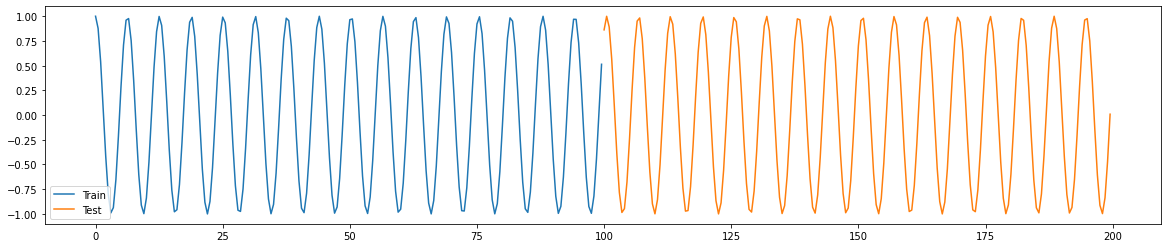

In [4]:
# Please DO NOT modify this cell.

train_x, train_data, test_x, test_data = get_data()

plt.figure(figsize = (20, 4))
plt.plot(train_x, train_data, label = 'Train')
plt.plot(test_x, test_data, label = 'Test')

plt.legend(loc = "lower left")
plt.show()    

In [5]:
# Please DO NOT modify this cell.
"""
Functions for creating sliding windows from the data, this is a useful function
to understand for any time-series prediction task
"""

def sliding_windows(data, seq_length):
    
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x), np.array(y)

In [6]:
# Please DO NOT modify this cell.

"""
Create sliding windows
"""

seq_length = 5
x_train, y_train = sliding_windows(train_data, seq_length)
x_test, y_test = sliding_windows(test_data, seq_length)

x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train).reshape(-1, 1)

x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test).reshape(-1, 1)

x_train = x_train[:, :, np.newaxis]
x_test = x_test[:, :, np.newaxis]

## Create the model

In [7]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size

        #### YOUR CODE STARTS HERE ####
        
        # Define a LSTM block and a FC block
        # Set batch_first = True
        
        self.lstm = nn.LSTM(input_size = input_size, 
                            hidden_size = hidden_size,
                            num_layers = num_layers, 
                            batch_first = True)
        
        self.fc = nn.Linear(hidden_size, num_classes)
        
        #### YOUR CODE ENDS HERE ####
    
    def forward(self, x):
           
        #### YOUR CODE STARTS HERE ####
        
        # Propagate input through LSTM
        # Pass the input, hidden state and cell_state
        
        output, (hidden_out, cell_out) = self.lstm(x)
    
        # Flatten hidden_out and pass it through fc layer
        
        hidden_out = hidden_out.view(-1, self.hidden_size)
        out = self.fc(hidden_out)

        #### YOUR CODE ENDS HERE ####
        
        return out

## Training

In [8]:
num_epochs = 350
learning_rate = 0.001

input_size = 1
hidden_size = 4
num_layers = 1

num_classes = 1

# Define LSTM model
lstm_model = LSTM(num_classes, input_size, hidden_size, num_layers)

# Set MSE loss as criterion
criterion = torch.nn.MSELoss()

# Use Adam optimizer
optimizer = torch.optim.Adam(lstm_model.parameters(), lr = learning_rate)

# Train the model

for epoch in range(1, num_epochs+1):

    #### YOUR CODE STARTS HERE ####
    
    # Pass x_train as input to the lstm network
    train_predict = lstm_model(x_train)
    
    # Clear gradients in the optimizer
    optimizer.zero_grad()
    
    # Calculate loss using criterion function
    loss = criterion(train_predict, y_train)
    
    # Calculate gradients with respect to the loss
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    #### YOUR CODE ENDS HERE ####
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{num_epochs}, loss: {loss.item():.2f}")

Epoch 10/350, loss: 0.53
Epoch 20/350, loss: 0.51
Epoch 30/350, loss: 0.50
Epoch 40/350, loss: 0.49
Epoch 50/350, loss: 0.48
Epoch 60/350, loss: 0.47
Epoch 70/350, loss: 0.46
Epoch 80/350, loss: 0.45
Epoch 90/350, loss: 0.44
Epoch 100/350, loss: 0.43
Epoch 110/350, loss: 0.42
Epoch 120/350, loss: 0.41
Epoch 130/350, loss: 0.40
Epoch 140/350, loss: 0.39
Epoch 150/350, loss: 0.37
Epoch 160/350, loss: 0.35
Epoch 170/350, loss: 0.33
Epoch 180/350, loss: 0.30
Epoch 190/350, loss: 0.27
Epoch 200/350, loss: 0.24
Epoch 210/350, loss: 0.21
Epoch 220/350, loss: 0.17
Epoch 230/350, loss: 0.14
Epoch 240/350, loss: 0.11
Epoch 250/350, loss: 0.08
Epoch 260/350, loss: 0.06
Epoch 270/350, loss: 0.05
Epoch 280/350, loss: 0.03
Epoch 290/350, loss: 0.03
Epoch 300/350, loss: 0.02
Epoch 310/350, loss: 0.01
Epoch 320/350, loss: 0.01
Epoch 330/350, loss: 0.01
Epoch 340/350, loss: 0.01
Epoch 350/350, loss: 0.01


## Question 1:

How many parameters are there in the model?

1.   117
2.   234
3.   115
4.   236

Ans: (1)

In [9]:
print(sum(p.numel() for p in lstm_model.parameters()))

117


## Question 2:

What is the mean squared error loss on the train set? (select the nearest value)

1.   0.0058
2.   0.1204
3.   0.9742
4.   0.5486

Ans-(1)

In [10]:
lstm_model.eval()

with torch.no_grad():
    pred = lstm_model(x_train)

train_loss = criterion(pred, y_train)
print(f"Train Loss: {train_loss.item():.4f}")

Train Loss: 0.0058


## Question 3:

What is the mean squared error loss on the test set? (select the nearest value)

1.   0.2187
2.   0.0059
3.   1.9696
4.   0.5497

Ans-(2)

In [11]:
lstm_model.eval()

with torch.no_grad():
    pred = lstm_model(x_test)

test_loss = criterion(pred, y_test)
print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.0059
